In [99]:
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
#Read in the Weather_Data.csv file into a Pandas DataFrame.
df = pd.read_csv('Weather_Data.csv')
df.head()

,dt_iso,city_name,temp,visibility
0,2017-01-01 00:00:00 +0000 UTC,Nassau County,44.29,10000.0
1,2017-01-01 01:00:00 +0000 UTC,Nassau County,44.11,10000.0
2,2017-01-01 02:00:00 +0000 UTC,Nassau County,43.83,10000.0
3,2017-01-01 03:00:00 +0000 UTC,Nassau County,44.49,10000.0
4,2017-01-01 04:00:00 +0000 UTC,Nassau County,44.74,10000.0


In [101]:
df.describe()

,temp,visibility
count,486640.000000,469428.000000
mean,55.412328,9373.045847
std,16.764003,1944.903533
min,-0.130000,100.000000
25%,42.030000,10000.000000
50%,54.880000,10000.000000
75%,69.820000,10000.000000
max,99.050000,10000.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486640 entries, 0 to 486639
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   dt_iso      486640 non-null  object 
 1   city_name   486640 non-null  object 
 2   temp        486640 non-null  float64
 3   visibility  469428 non-null  float64
dtypes: float64(2), object(2)
memory usage: 14.9+ MB


In [103]:
# Convert ISO datetime to pandas datetime with specified format
df['date'] = pd.to_datetime(df['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')

# Extract the date part
df['date'] = df['date'].dt.date

In [104]:
df.head()

,dt_iso,city_name,temp,visibility,date
0,2017-01-01 00:00:00 +0000 UTC,Nassau County,44.29,10000.0,2017-01-01
1,2017-01-01 01:00:00 +0000 UTC,Nassau County,44.11,10000.0,2017-01-01
2,2017-01-01 02:00:00 +0000 UTC,Nassau County,43.83,10000.0,2017-01-01
3,2017-01-01 03:00:00 +0000 UTC,Nassau County,44.49,10000.0,2017-01-01
4,2017-01-01 04:00:00 +0000 UTC,Nassau County,44.74,10000.0,2017-01-01


# Temperature Visualization

In [105]:
df_temperature = df[['date', 'city_name', 'temp']]
df_temperature.set_index('date')

,city_name,temp
date,,
2017-01-01,Nassau County,44.29
2017-01-01,Nassau County,44.11
2017-01-01,Nassau County,43.83
2017-01-01,Nassau County,44.49
2017-01-01,Nassau County,44.74
...,...,...
2024-06-30,Richmond County,87.42
2024-06-30,Richmond County,87.42
2024-06-30,Richmond County,84.02


In [106]:
# Group by city_name and date, and calculate the average temperature
df_grouped = df_temperature.groupby(['city_name', 'date']).mean().reset_index()

In [107]:
# Create a pivot table
df_pivot = df_grouped.pivot(index='date', columns='city_name', values='temp')

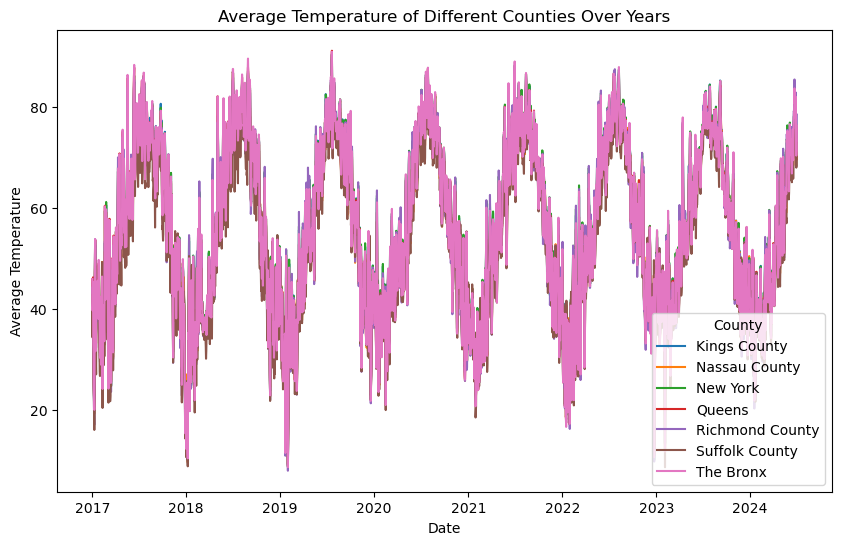

In [108]:
# Plot the data
df_pivot.plot(kind='line', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature of Different Counties Over Years')
plt.legend(title='County')
plt.show()

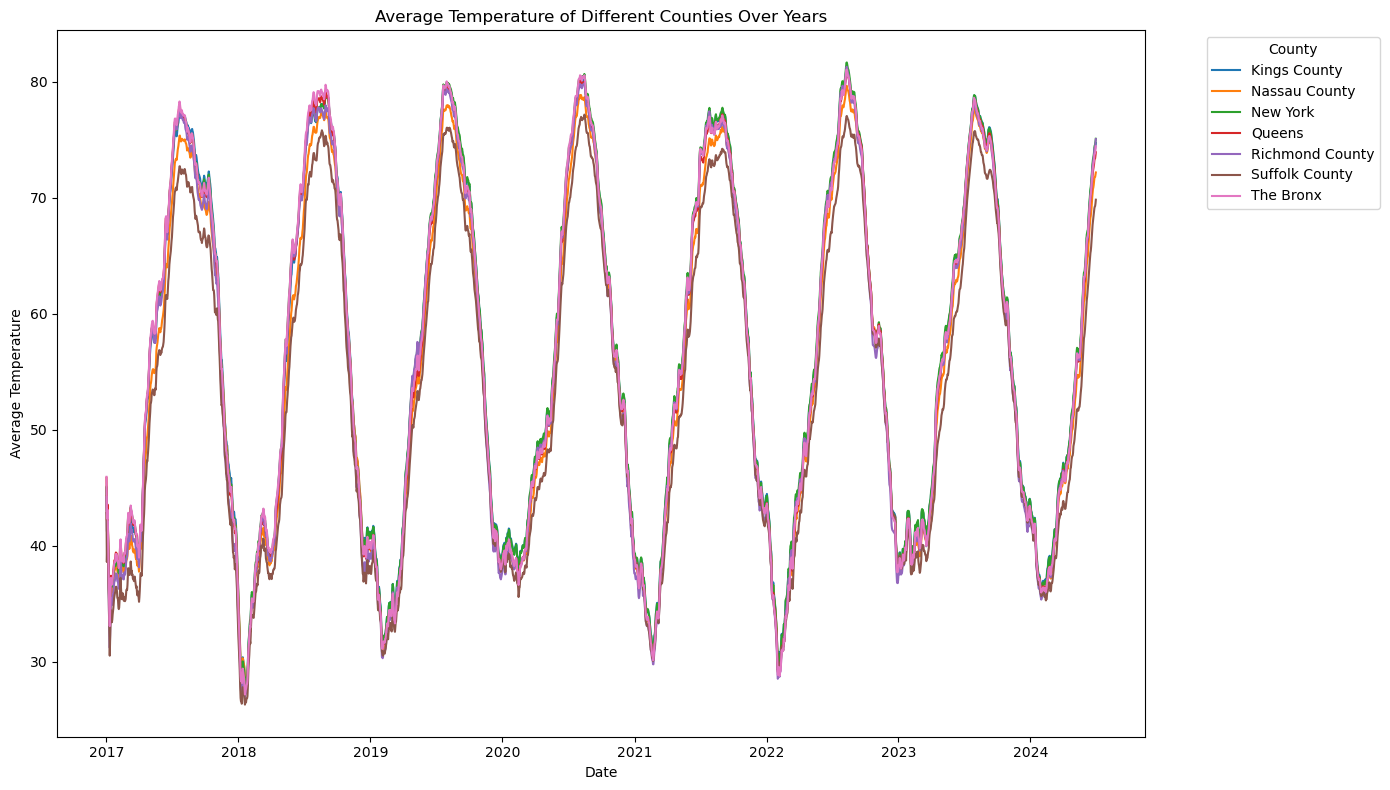

In [109]:
# Apply a rolling average to smooth the data
df_pivot = df_pivot.rolling(window=30, min_periods=1).mean()

# Plot the data
plt.figure(figsize=(14, 8))
df_pivot.plot(ax=plt.gca())

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature of Different Counties Over Years')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

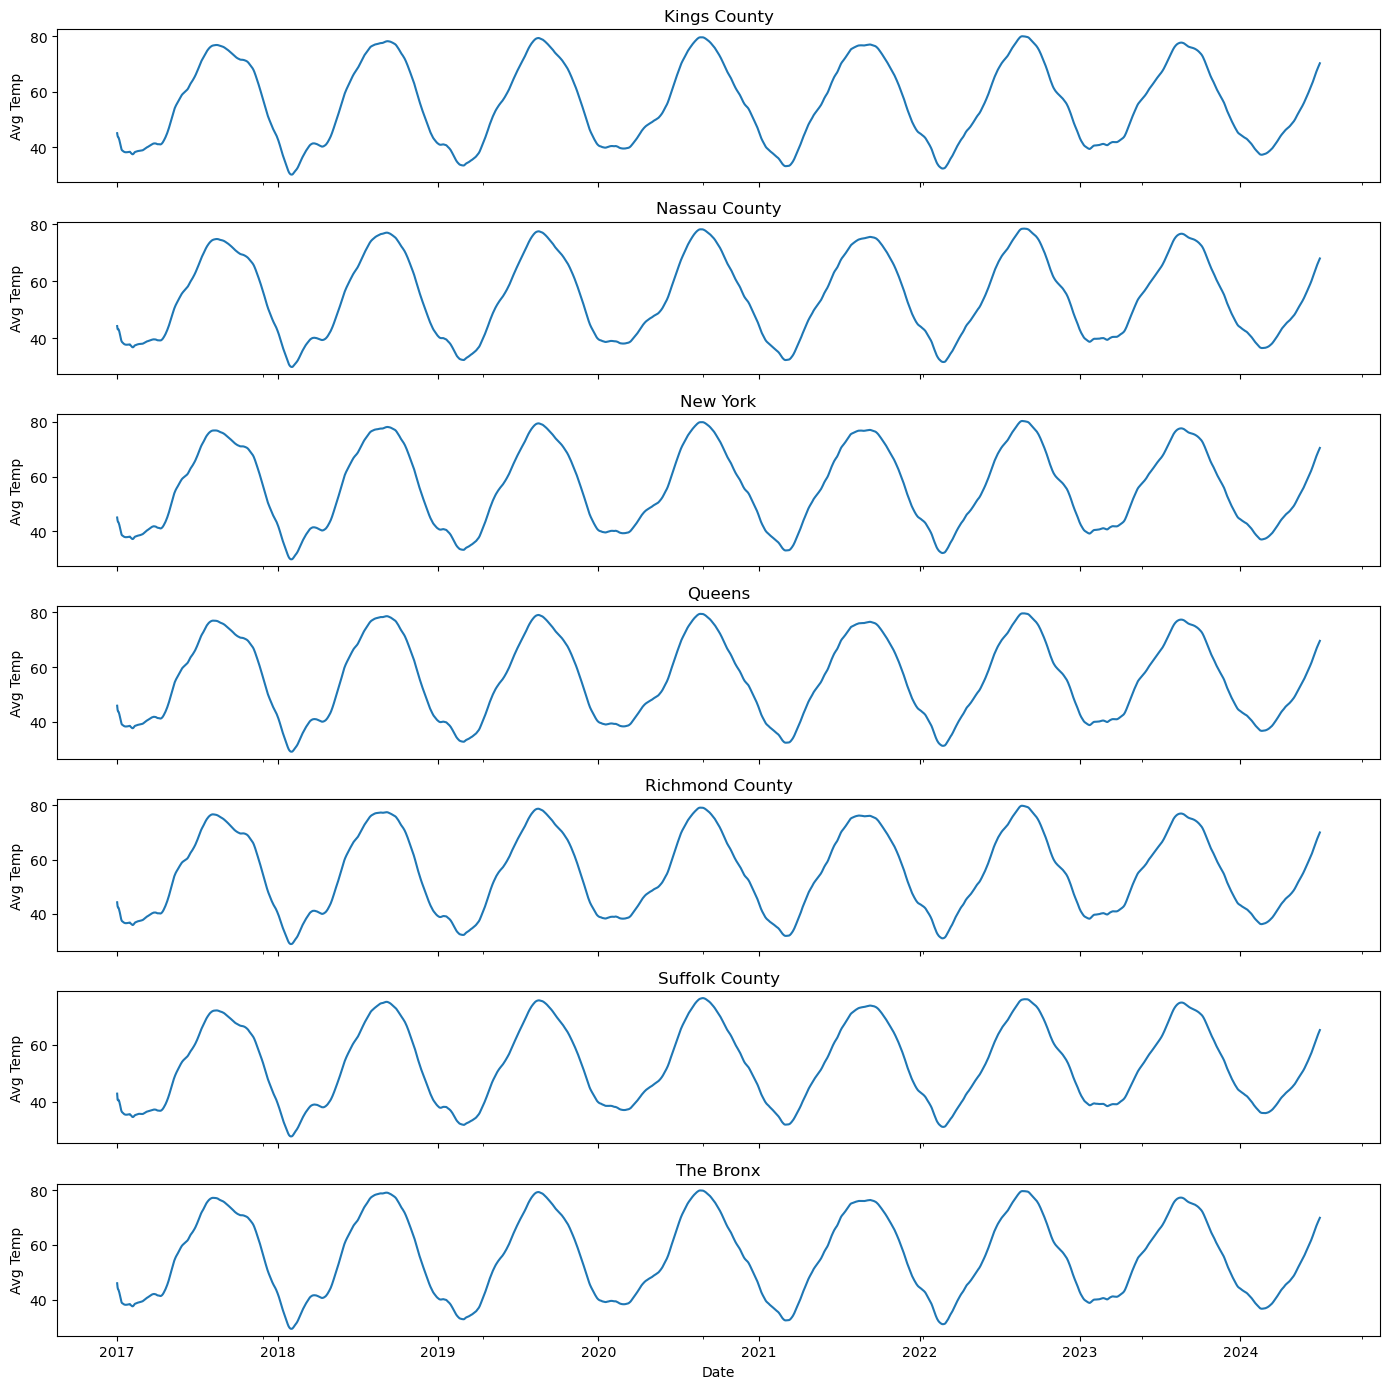

In [110]:
# Apply a rolling average to smooth the data
df_pivot = df_pivot.rolling(window=30, min_periods=1).mean()

# Plot the data with subplots for each county
counties = df_pivot.columns
num_counties = len(counties)
fig, axes = plt.subplots(nrows=num_counties, ncols=1, figsize=(14, 2 * num_counties), sharex=True)

for ax, county in zip(axes, counties):
    df_pivot[county].plot(ax=ax, title=county)
    ax.set_ylabel('Avg Temp')
    ax.legend().set_visible(False)

plt.xlabel('Date')
plt.tight_layout()
plt.show()